## Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods 

---

### Table of Contents

+ Introduction
+ Business Background
+ Target Audience
+ Data Overview
+ Methodology
+ Results
+ Discussion
+ Conclusion
+ References


## Introduction

+ **Introduction / Description of the project**

    Toronto is the provincial capital of Ontario and the most populous city in Canada, with a population of 2,731,571 .
    In 2016, foreign-born persons made up 47 per cent of the population, compared to 49.9 per cent in 2006. 
    
    According to the United Nations Development Programme, Toronto has the second-highest percentage of constant foreign-born   population among world cities, after Miami, Florida. While Miami's foreign-born population has traditionally consisted primarily of Cubans and other Latin Americans, no single nationality or culture dominates Toronto's immigrant population, placing it among the most diverse cities in the world. In 2010, it was estimated over 100,000 immigrants arrive in the Greater Toronto Area each year.   
     
    Food is a big deal in Toronto. Not only do we need it to live, but we’ve come into our own as a foodie destination. New restaurants are constantly opening, and chefs continue to push culinary boundaries to come up with new and innovative ideas. It’s a bit dizzying just how MUCH good stuff there is to eat here.
    
    With it’s diverse culture , comes diverse food items. There are many restaurants in Toronto, each belonging to different categories like Chinese , Indian , French etc. 
    
    In this project we will try to analyse all the **Indian Restaurant** currently present in Toronto's different neighborhood and check the top few Indian Restaurant's popularity from its Like, rating, tips etc and will able to provide an final result/analysis at the end of this project. 
   


---

### Background of the Business Problem

+ **Business Problem**

Here in our project we will check all the **Indian Restaurant** that are present in differrent Postalcode, Boroughs and Neighborhoods of Toronto.
We will analyse the data of Toronto's Borough and Neighborshoods and see where the Indian Restaurant are in highest number and in high demand and then we will compare all the Indian Restaurant according to their Likes, Tips and Rating. We will visualize all the great Indian Restaurant in different types of graphs and map.

I will first provide the initial data preparation and describe future steps to start the project below. 

I will go through each step of this project and address them separately.


+ **Target Audience** 

*Who all will be beneficial from this  project :*

+ _Business Persons_ who are interested to invest and launch new Indian Restaurant in Torontos's different Neighborhood, will get an idea about currently in which neighborhood people are loving Indian food and where new Indian Restaurant needs to be opened to let people have the taste of Indian Food. And where there will a tough competetion between other great Indian restaurants who are currently running in smooth way and if he sets a plan to open a new Indian restaurant then this  comprehensive guide will help him/her to know the prime competitors . 


+ _Student_ and other _foreign-born population_ can look into our analysis and find out the top place to visit for Indian Cuisine in Toronto and enjoy their meal.


+ _Data Scientist/Analyst_ can view our analysis for this project and can have a good idea to implement in other different problem using the techniques and ideas used here.



***

## DATA Preparation

+ **DATA Collection**

  In this project we will be needing the below data : 
  
    
+ **Web Scrape** the City of Toronto data that contains PostalCode, Borough, and Neighborhood.  

   _For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore_
   _and cluster the neighborhoods in Toronto._
   _You will be required to scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe_
   _so that it is in a structured format like the New York dataset._
   
   _Data:  https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M_
   
   For scraping the data we will be using **BeautifulSoup package.**  
   
   
   
+ We will need geopy library to get the latitude and longitude values of Toronto City.

   _Data:  We will utilize the **Foursquare** location data, we need to get the latitude and the longitude coordinates of each neighborhood._
                https://cocl.us/Geospatial_data
              
              
              
+ Venues of all Indian Restaurant in Toronto city and their rating, likes and tips information data.

    _Data : Foursquare API_ 
    
    
    
+  Visualize the data in form of Boundary Map.

    _Data : Folium package (Folium is a python library that can create interactive leaflet map using coordinate data.)_  
    
      _Sk-learn package & yellowbrick package_
             
                       
                       
    

___

## DATA processing steps

-: **Steps** :-


+  Firstly we will web scrap data and collect Toronto city's data that contains PostalCode, Borough, and Neighborhood and put it in a dataframe.


+  We will then clean the data according to our need, remove unassigned values in borough or unwanted features and merge different neighborhood with same borough etc.



+  Foursquare api will help to get the coordinates i:e latitude and longitude of all the neighborhoods of Toronto city via Geopy Client.


+  Filter out the Venues of all Indian Restaurant present in Toronto city.


+  We will then collect the likes, rating , tips etc for each of the indian restaurant and then sort them according to their values .


+  The comparison data and the ranking will be plotted on Bar Chart graphs using matplotlib library, Seaborn library , Sk-learn package & yellowbrick package library .


+  We will Visualize the data of top Neighborhood based on the venue categories in a Toronto City map using _Folium Package_.



+  Finally, we will cluster these top Neighborhood based on the venue categories and use K-Means clustering Machine learning technique to build a model using Elbow point method.




    

---

## Methodology

+ Importing all the Important packages and libraries that will be used in this project

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from bs4 import BeautifulSoup
import requests
import json # library to handle JSON files

#Use geopy library to get the latitude and longitude values of New York City
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

#!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


We will use _BeautifulSoup_ package to get all the Toronto City details i:e 'Borough' , 'Postalcode' and 'Neighborhood'

In [2]:

website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_url, 'xml')

table=soup.find('table')
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)


In [3]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [4]:
df.head()

Postalcode           Borough               Neighborhood
0        M1A      Not assigned                           
1        M2A      Not assigned                           
2        M3A        North York                  Parkwoods
3        M4A        North York           Victoria Village
4        M5A  Downtown Toronto  Regent Park, Harbourfront

## Data Cleansing

In [5]:
# check names of indexes for which Borough column has value "Not assigned"
indexNames = df[ df['Borough'] =='Not assigned'].index

# Delete the row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.loc[df['Neighborhood'] =='Not assigned' , 'Neighborhood'] = df['Borough']
result = df.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)
df_new=result.reset_index()
df_new.head(10)

Postalcode           Borough                                 Neighborhood
0        M3A        North York                                    Parkwoods
1        M4A        North York                             Victoria Village
2        M5A  Downtown Toronto                    Regent Park, Harbourfront
3        M6A        North York             Lawrence Manor, Lawrence Heights
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government
5        M9A         Etobicoke      Islington Avenue, Humber Valley Village
6        M1B       Scarborough                               Malvern, Rouge
7        M3B        North York                                    Don Mills
8        M4B         East York              Parkview Hill, Woodbine Gardens
9        M5B  Downtown Toronto                     Garden District, Ryerson

In [6]:
df_cor = pd.read_csv("F:/Ebook & Tutorials/DATA SCIENCE/Data science specialization I/Notes/Capstone Project/Geospatial_Coordinates.csv")
df_cor.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [7]:
df_cor.columns=['Postalcode','Latitude','Longitude']

Df_new2 = pd.merge(df_new,
                 df_cor[['Postalcode','Latitude', 'Longitude']],
                 on='Postalcode')
Df_new2

Postalcode           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   
12         M1C       Scarborough   
13         M3C        North York   
14         M4C         East York   
15         M5C  Downtown Toronto   
16         M6C              York   
17         M9C         Etobicoke   
18         M1E       Scarborough   
19         M4E      East Toronto   
20         M5E  Downtown Toronto   
21         M6E              York   
22         M1G       Scarborough   
23         M4G         East York   
24         M5G  Downtown Toronto   
25         M6G  Downtown Toronto   
26         M1H       Scarborough   
27         M2H        North York   
28         M3H        North York   
29         M4H         East York   
30         M5H  Downtown Toronto   
31         M6H      West Toronto   
32         M1J       Scarborough   
33         M2J        North York   
34         M3J        North York   
35         M4J         East York   
36         M5J  Downtown Toronto   
37         M6J      West Toronto   
38         M1K       Scarborough   
39         M2K        North York   
40         M3K        North York   
41         M4K      East Toronto   
42         M5K  Downtown Toronto   
43         M6K      West Toronto   
44         M1L       Scarborough   
45         M2L        North York   
46         M3L        North York   
47         M4L      East Toronto   
48         M5L  Downtown Toronto   
49         M6L        North York   
50         M9L        North York   
51         M1M       Scarborough   
52         M2M        North York   
53         M3M        North York   
54         M4M      East Toronto   
55         M5M        North York   
56         M6M              York   
57         M9M        North York   
58         M1N       Scarborough   
59         M2N        North York   
60         M3N        North York   
61         M4N   Central Toronto   
62         M5N   Central Toronto   
63         M6N              York   
64         M9N              York   
65         M1P       Scarborough   
66         M2P        North York   
67         M4P   Central Toronto   
68         M5P   Central Toronto   
69         M6P      West Toronto   
70         M9P         Etobicoke   
71         M1R       Scarborough   
72         M2R        North York   
73         M4R   Central Toronto   
74         M5R   Central Toronto   
75         M6R      West Toronto   
76         M7R       Mississauga   
77         M9R         Etobicoke   
78         M1S       Scarborough   
79         M4S   Central Toronto   
80         M5S  Downtown Toronto   
81         M6S      West Toronto   
82         M1T       Scarborough   
83         M4T   Central Toronto   
84         M5T  Downtown Toronto   
85         M1V       Scarborough   
86         M4V   Central Toronto   
87         M5V  Downtown Toronto   
88         M8V         Etobicoke   
89         M9V         Etobicoke   
90         M1W       Scarborough   
91         M4W  Downtown Toronto   
92         M5W  Downtown Toronto   
93         M8W         Etobicoke   
94         M9W         Etobicoke   
95         M1X       Scarborough   
96         M4X  Downtown Toronto   
97         M5X  Downtown Toronto   
98         M8X         Etobicoke   
99         M4Y  Downtown Toronto   
100        M7Y      East Toronto   
101        M8Y         Etobicoke   
102        M8Z         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                            Parkwoods  43.753259 -79.329656  
1                                     Victoria Village  43.725882 -79.315572  
2                     

In [8]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="my_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [9]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '' # your Foursquare ID
    CLIENT_SECRET = '' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

## Exploratory Data Analysis

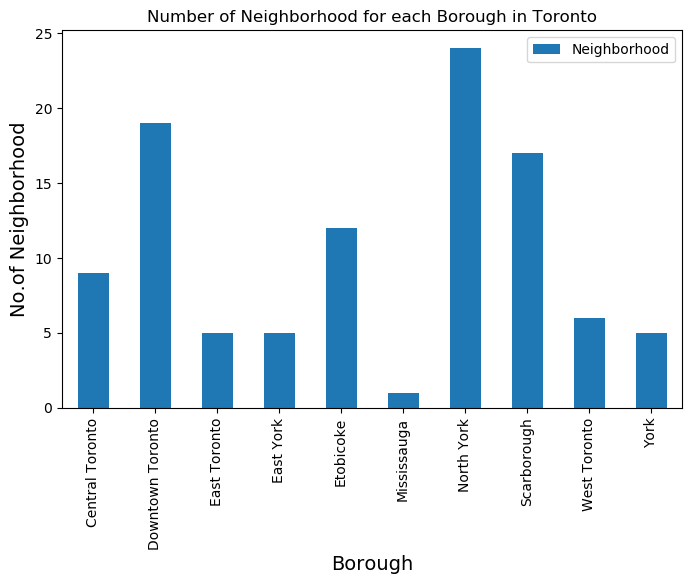

In [10]:
plt.figure(figsize=(8,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 14)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=14)
#giving a bar plot
Df_new2.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

+ **North York** Borough has Highest no of Neighborhood in Toronto city.

In [11]:
Df_new2.head()

Postalcode           Borough                                 Neighborhood  \
0        M3A        North York                                    Parkwoods   
1        M4A        North York                             Victoria Village   
2        M5A  Downtown Toronto                    Regent Park, Harbourfront   
3        M6A        North York             Lawrence Manor, Lawrence Heights   
4        M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

In [12]:
# The total neighborhood list which contains indian restaurants in Toronto City
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_toronto=pd.DataFrame(columns=column_names)
count=1
for row in Df_new2.values.tolist():
    Postalcode, Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_restaurants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(Df_new2),')','Indian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(indian_restaurants)))
    for restaurant_detail in indian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        indian_rest_toronto = indian_rest_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Indian Restaurants in Parkwoods, North York:0
( 2 / 103 ) Indian Restaurants in Victoria Village, North York:0
( 3 / 103 ) Indian Restaurants in Regent Park, Harbourfront, Downtown Toronto:1
( 4 / 103 ) Indian Restaurants in Lawrence Manor, Lawrence Heights, North York:0
( 5 / 103 ) Indian Restaurants in Queen's Park, Ontario Provincial Government, Downtown Toronto:1
( 6 / 103 ) Indian Restaurants in Islington Avenue, Humber Valley Village, Etobicoke:0
( 7 / 103 ) Indian Restaurants in Malvern, Rouge, Scarborough:0
( 8 / 103 ) Indian Restaurants in Don Mills, North York:0
( 9 / 103 ) Indian Restaurants in Parkview Hill, Woodbine Gardens, East York:0
( 10 / 103 ) Indian Restaurants in Garden District, Ryerson, Downtown Toronto:0
( 11 / 103 ) Indian Restaurants in Glencairn, North York:0
( 12 / 103 ) Indian Restaurants in West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale, Etobicoke:0
( 13 / 103 ) Indian Restaurants in Rouge Hill, Port Union, Highland Cree

In [13]:
indian_rest_toronto.head(10)

Borough                                 Neighborhood  \
0  Downtown Toronto                    Regent Park, Harbourfront   
1  Downtown Toronto  Queen's Park, Ontario Provincial Government   
2      East Toronto                                  The Beaches   
3       Scarborough                                       Woburn   
4         East York                                      Leaside   
5  Downtown Toronto                                     Christie   
6  Downtown Toronto                                     Christie   
7       Scarborough                                    Cedarbrae   
8       Scarborough                                    Cedarbrae   
9         East York                             Thorncliffe Park   

                         ID                        Name  
0  4af9a379f964a520c91222e3               Bombay Palace  
1  4bedf8b5e24d20a17b567214       Kothur Indian Cuisine  
2  4dcd7c6352b1f8915b7e7f7e                Delhi Bistro  
3  4c632edeedd320a19ad5ae29               Bombay Palace  
4  504bcf32e4b0ef19b0e2ecf8       Mt Everest Restaurant  
5  4adb969ef964a520332921e3      Banjara Indian Cuisine  
6  4b7369d7f964a52049ad2de3               Madras Masala  
7  4d6008f829ef236a8832a059             CANBE Foods Inc  
8  4c77fc87bd346dcb8c90f0ef               La Sani Grill  
9  4daf08e66e81e2dffdd4fe40  Iqbal Kebab & Sweet Centre

In [14]:
#Total Indian Restaurant in Toronto City 

indian_rest_toronto.shape

(45, 4)

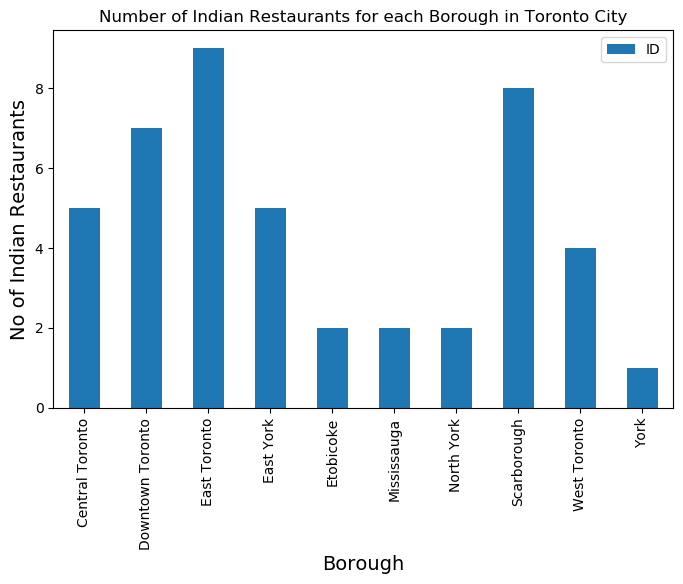

In [15]:
# To know the maximum no of Indian Restaurant in each Borough we will plot the data grouping by Borough
plt.figure(figsize=(8,5), dpi = 100)
# Title
plt.title('Number of Indian Restaurants for each Borough in Toronto City')
# x-axis
plt.xlabel('Borough', fontsize = 14)
# y-axis
plt.ylabel('No of Indian Restaurants', fontsize=14)
#Creating bar plot
indian_rest_toronto.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

+ **East Toronto** Borough has max no of Indian Restuarant in Toronto City

In [16]:
indian_rest_toronto.groupby('Borough')['ID'].count()

Borough
Central Toronto     5
Downtown Toronto    7
East Toronto        9
East York           5
Etobicoke           2
Mississauga         2
North York          2
Scarborough         8
West Toronto        4
York                1
Name: ID, dtype: int64

**East Toronto** Borough has **9** Indian Restaurant followed by **Scarborough**which has **8** and
 **Downtown Toronto** which has **7** Indian Restaurant where as **York** Borough has least Indian Restaurant preset its count is only **1** in Toronto City respectively.

In [17]:
## Now we will check top 10 Neighborhoods which has max no of Indian Restaurant present.
Toronto_top_5_Neighbor = indian_rest_toronto.groupby('Neighborhood')['ID'].count().nlargest(5).to_frame(name='Total')
Toronto_top_5_Neighbor=Toronto_top_5_Neighbor.reset_index()
Toronto_top_5_Neighbor.rename(index=str, columns={"index": "Neighborhood", "Total": "Total Indian Restaurant"}, inplace=True)
Toronto_top_5_Neighbor

Neighborhood  Total Indian Restaurant
0                India Bazaar, The Beaches West                        7
1                                    Davisville                        3
2                              Thorncliffe Park                        3
3  Brockton, Parkdale Village, Exhibition Place                        2
4         Canada Post Gateway Processing Centre                        2

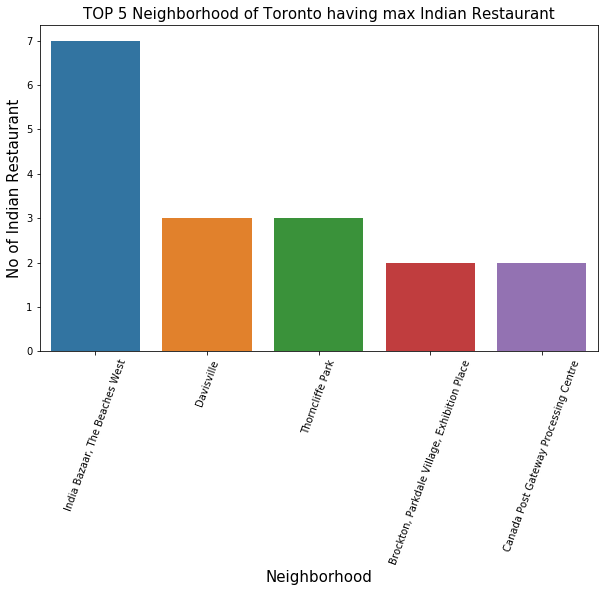

In [18]:
# We will Visualize the data in Bar Chart Graph
import seaborn as sns
fig = plt.figure(figsize=(10,6))
s=sns.barplot(x="Neighborhood", y="Total Indian Restaurant", data=Toronto_top_5_Neighbor)
s.set_xticklabels(s.get_xticklabels(), rotation=70)
plt.title('TOP 5 Neighborhood of Toronto having max Indian Restaurant', fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("No of Indian Restaurant", fontsize=15)
plt.savefig("TOP_5_Neighborhood.png", dpi=300)
plt.show()

TOP 5 Neighborhood are selected  
**India Bazaar, The Beaches West** Neighborhoods has maximum no of Indian Restaurant with a count of  **7** followed by **Davisville** and **Thorncliffe Park** which has **3** Indian Restaurant each in Toronto City respectively.

In [19]:
## We will check in which Borough India Bazaar, The Beaches West falls under.
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='India Bazaar, The Beaches West']

Borough                    Neighborhood                        ID  \
17  East Toronto  India Bazaar, The Beaches West  4ae0c7a8f964a520638221e3   
18  East Toronto  India Bazaar, The Beaches West  4afc9816f964a520312422e3   
19  East Toronto  India Bazaar, The Beaches West  4bac30a2f964a52018ea3ae3   
20  East Toronto  India Bazaar, The Beaches West  4bbcc0efa0a0c9b60ebd1a0f   
21  East Toronto  India Bazaar, The Beaches West  4ad9052cf964a520301721e3   
22  East Toronto  India Bazaar, The Beaches West  4d8d278a1d06b1f712942a3b   
23  East Toronto  India Bazaar, The Beaches West  4c427065ce54e21eefc30c1a   

                  Name  
17        Udupi Palace  
18           Motimahal  
19    Bombay Chowpatty  
20         Haandi 2000  
21  Regency Restaurant  
22             Gautama  
23   Baldev Paan House

+ It is under the **East Toronto** Borough The **Indian Bazaar, The Beaches West** Neighbourhood falls, which has maximum no of Indian Cuisine Restaurant in Toronto city.

In [20]:
toronto_5_merge = Toronto_top_5_Neighbor.join(Df_new2.set_index("Neighborhood"), on="Neighborhood")

print(toronto_5_merge.shape)
toronto_5_merge.head()

(5, 6)


Neighborhood  Total Indian Restaurant  \
0                India Bazaar, The Beaches West                        7   
1                                    Davisville                        3   
2                              Thorncliffe Park                        3   
3  Brockton, Parkdale Village, Exhibition Place                        2   
4         Canada Post Gateway Processing Centre                        2   

  Postalcode          Borough   Latitude  Longitude  
0        M4L     East Toronto  43.668999 -79.315572  
1        M4S  Central Toronto  43.704324 -79.388790  
2        M4H        East York  43.705369 -79.349372  
3        M6K     West Toronto  43.636847 -79.428191  
4        M7R      Mississauga  43.636966 -79.615819

In [21]:
import folium
# # create map of top 5 Neighborhood having Indian Restaurant using latitude and longitude values

#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
latitude_toronto = Df_new2['Latitude'].mean()
longitude_toronto = Df_new2['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(latitude_toronto, longitude_toronto))


Toronto_5_topmap = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# add markers to map
for lat, lng, label in zip(toronto_5_merge['Latitude'], toronto_5_merge['Longitude'], 
                           toronto_5_merge['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Toronto_5_topmap)  
    
Toronto_5_topmap
   


The geographical coordinates of Toronto are 43.70460773398059, -79.39715291165048


In [46]:
## We will create a function to get all the venue details such as Ratings , Likes and Tips for all the Restaurants in Toronto city.

def get_venue_details(venue_id):
        
    CLIENT_ID = '' # your Foursquare ID
    CLIENT_SECRET = '' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [47]:
#Neighborhood list that contains indian restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_toronto_popular=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_toronto.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_toronto),')','processed')
    indian_rest_toronto_popular = indian_rest_toronto_popular.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID           Name  Likes  Rating  Tips
0  4af9a379f964a520c91222e3  Bombay Palace     14     7.2    13
( 1 / 46 ) processed
                         ID               Name  Likes  Rating  Tips
0  52af6dc5498e33995b0bbf03  Sultan Of Samosas      9     6.8     4
( 2 / 46 ) processed
                         ID                   Name  Likes  Rating  Tips
0  4bedf8b5e24d20a17b567214  Kothur Indian Cuisine     16     8.1    19
( 3 / 46 ) processed
                         ID          Name  Likes  Rating  Tips
0  4dcd7c6352b1f8915b7e7f7e  Delhi Bistro      6     7.0     3
( 4 / 46 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c632edeedd320a19ad5ae29
( 5 / 46 ) processed
                         ID                   Name  Likes  Rating  Tips
0  504bcf32e4b0ef19b0e2ecf8  Mt Everest Restaurant      8     6.5     6
( 6 / 46 ) processed
                         ID                    Name  Likes  Rating  Tips
0  4a

In [48]:
indian_rest_toronto_popular.head(10)

Borough                                 Neighborhood  \
0  Downtown Toronto                    Regent Park, Harbourfront   
1  Downtown Toronto                    Regent Park, Harbourfront   
2  Downtown Toronto  Queen's Park, Ontario Provincial Government   
3      East Toronto                                  The Beaches   
4       Scarborough                                       Woburn   
5         East York                                      Leaside   
6  Downtown Toronto                                     Christie   
7  Downtown Toronto                                     Christie   
8       Scarborough                                    Cedarbrae   
9       Scarborough                                    Cedarbrae   

                         ID                    Name Likes  Rating Tips  
0  4af9a379f964a520c91222e3           Bombay Palace    14     7.2   13  
1  52af6dc5498e33995b0bbf03       Sultan Of Samosas     9     6.8    4  
2  4bedf8b5e24d20a17b567214   Kothur Indian Cuisine    16     8.1   19  
3  4dcd7c6352b1f8915b7e7f7e            Delhi Bistro     6     7.0    3  
4                         0                       0     0     0.0    0  
5  504bcf32e4b0ef19b0e2ecf8   Mt Everest Restaurant     8     6.5    6  
6  4adb969ef964a520332921e3  Banjara Indian Cuisine   142     8.8   75  
7  4b7369d7f964a52049ad2de3           Madras Masala    35     7.9   21  
8  4d6008f829ef236a8832a059         CANBE Foods Inc    22     8.0    8  
9  4c77fc87bd346dcb8c90f0ef           La Sani Grill    12     6.8   12

In [50]:
## Total no of Indian Restaurant which has all the statistics
indian_rest_toronto_popular.shape

(46, 7)

In [51]:
# Lets save this data
indian_rest_toronto_popular.to_csv('indian_rest_toronto_popular.csv', index=False)

In [22]:
indian_rest_toronto_popular=pd.read_csv('indian_rest_toronto_popular.csv')
indian_rest_toronto_popular.head()

Borough                                 Neighborhood  \
0  Downtown Toronto                    Regent Park, Harbourfront   
1  Downtown Toronto  Queen's Park, Ontario Provincial Government   
2      East Toronto                                  The Beaches   
3       Scarborough                                       Woburn   
4         East York                                      Leaside   

                         ID                   Name  Likes  Rating  Tips  
0  4af9a379f964a520c91222e3          Bombay Palace     14     7.2    13  
1  4bedf8b5e24d20a17b567214  Kothur Indian Cuisine     16     8.1    19  
2  4dcd7c6352b1f8915b7e7f7e           Delhi Bistro      6     7.0     3  
3                         0                      0      0     0.0     0  
4  504bcf32e4b0ef19b0e2ecf8  Mt Everest Restaurant      8     6.5     6

In [23]:
#Now check the datatypes of the columns , we need to make every column as float to get a proper result
indian_rest_toronto_popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
Borough         45 non-null object
Neighborhood    45 non-null object
ID              45 non-null object
Name            45 non-null object
Likes           45 non-null int64
Rating          45 non-null float64
Tips            45 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.6+ KB


In [24]:
indian_rest_toronto_popular['Likes']=indian_rest_toronto_popular['Likes'].astype('float64')
indian_rest_toronto_popular['Tips']=indian_rest_toronto_popular['Tips'].astype('float64')
indian_rest_toronto_popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
Borough         45 non-null object
Neighborhood    45 non-null object
ID              45 non-null object
Name            45 non-null object
Likes           45 non-null float64
Rating          45 non-null float64
Tips            45 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.6+ KB


In [25]:
#We will now check the Restuarant with maximum Likes
indian_rest_toronto_popular.iloc[indian_rest_toronto_popular['Likes'].idxmax()]

Borough                 Downtown Toronto
Neighborhood                    Christie
ID              4adb969ef964a520332921e3
Name              Banjara Indian Cuisine
Likes                                142
Rating                               8.8
Tips                                  75
Name: 5, dtype: object

In [26]:
#We will now check the Restuarant with maximum Rating
indian_rest_toronto_popular.iloc[indian_rest_toronto_popular['Rating'].idxmax()]

Borough                 Downtown Toronto
Neighborhood                    Christie
ID              4adb969ef964a520332921e3
Name              Banjara Indian Cuisine
Likes                                142
Rating                               8.8
Tips                                  75
Name: 5, dtype: object

In [27]:
#We will now check the Restuarant with maximum Tips
indian_rest_toronto_popular.iloc[indian_rest_toronto_popular['Tips'].idxmax()]

Borough                 Downtown Toronto
Neighborhood                    Christie
ID              4adb969ef964a520332921e3
Name              Banjara Indian Cuisine
Likes                                142
Rating                               8.8
Tips                                  75
Name: 5, dtype: object

+ We can see **Banjara Indian Cuisine** of Indian Restaurant got the Max _Likes_ , _Rating_ & _Tips_.
It belongs to **Christie** Neighborhood and of **Downtown Toronto** Borough.

In [28]:
#Now lets visualize neighborhood with maximum average rating of resturants
tor_neighborhood_stats=indian_rest_toronto_popular.groupby('Neighborhood', as_index=False).mean()[['Neighborhood','Rating']]
tor_neighborhood_stats.columns=['Neighborhood','Average Rating']

tor_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

Neighborhood  Average Rating
19                   St. James Town, Cabbagetown            8.40
5                                       Christie            8.35
11                 High Park, The Junction South            8.30
21           The Annex, North Midtown, Yorkville            8.15
6                           Church and Wellesley            8.10
15   Queen's Park, Ontario Provincial Government            8.10
26                             Wexford, Maryvale            8.00
2   Brockton, Parkdale Village, Exhibition Place            7.85
1              Bedford Park, Lawrence Manor East            7.40
4                                      Cedarbrae            7.40

+ Above is the list of Neighborhood with top Average rating Indian Restaurant.

**St. James Town, Cabbagetown** Neighborhood has the Highest Avg Rating in Toronto City with **8.40** rating.

In [29]:
tor_neighborhood_stats=tor_neighborhood_stats[tor_neighborhood_stats['Average Rating']>=8.0]
tor_avg_final=tor_neighborhood_stats.sort_values(['Average Rating'],ascending=False)
tor_avg_final.head(10)

Neighborhood  Average Rating
19                  St. James Town, Cabbagetown            8.40
5                                      Christie            8.35
11                High Park, The Junction South            8.30
21          The Annex, North Midtown, Yorkville            8.15
6                          Church and Wellesley            8.10
15  Queen's Park, Ontario Provincial Government            8.10
26                            Wexford, Maryvale            8.00

#### Top 10 Indian Restaurant with Highest Avg Ratings in different Neighborhood in Toronto City

In [30]:
avg_rate_merge = tor_avg_final.join(indian_rest_toronto_popular.set_index("Neighborhood"), on="Neighborhood")
avg_rate_merge[['Name','Borough','Neighborhood','Average Rating']].head(10)

Name           Borough  \
19  Butter Chicken Factory  Downtown Toronto   
5   Banjara Indian Cuisine  Downtown Toronto   
5            Madras Masala  Downtown Toronto   
11             Curry Twist      West Toronto   
21   Roti Cuisine of India   Central Toronto   
21                The Host   Central Toronto   
6    Kothur Indian Cuisine  Downtown Toronto   
15   Kothur Indian Cuisine  Downtown Toronto   
26       Patna Kebab House       Scarborough   

                                   Neighborhood  Average Rating  
19                  St. James Town, Cabbagetown            8.40  
5                                      Christie            8.35  
5                                      Christie            8.35  
11                High Park, The Junction South            8.30  
21          The Annex, North Midtown, Yorkville            8.15  
21          The Annex, North Midtown, Yorkville            8.15  
6                          Church and Wellesley            8.10  
15  Queen's Park, Ontario Provincial Government            8.10  
26                            Wexford, Maryvale            8.00

**Butter Chicken Factory** has the Highest Rating  followed by **Banjara Indian Cuisine** and **Madras Masala**.

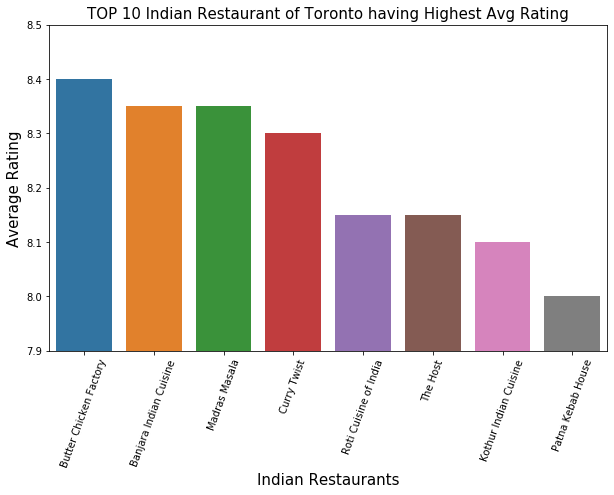

In [31]:
# We will Visualize the data in Bar Chart Graph
import seaborn as sns
fig = plt.figure(figsize=(10,6))
s=sns.barplot(x="Name", y="Average Rating", data=avg_rate_merge)
s.set_xticklabels(s.get_xticklabels(), rotation=70)
plt.title('TOP 10 Indian Restaurant of Toronto having Highest Avg Rating', fontsize=15)
plt.xlabel("Indian Restaurants", fontsize=15)
plt.ylabel ("Average Rating", fontsize=15)
plt.ylim(7.9, 8.5)
plt.savefig("TOP_10_Indian_Restaurant.png", dpi=300)
plt.show()

___

**Now we will analyze each neighborhood**

In [32]:
#venues.groupby('Neighborhood').count()

indian_rest_toronto.groupby('Neighborhood').count()
indian_rest_toronto.shape


(45, 4)

In [33]:
print('There are {} uniques Neighborhoods.'.format(len(indian_rest_toronto['Neighborhood'].unique())))

There are 29 uniques Neighborhoods.


In [34]:
    
    CLIENT_ID = '' # your Foursquare ID
    CLIENT_SECRET = '' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    print('Credentials Stored')


Credentials Stored


In [35]:
#Lets define a function to extract the venues data

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
Toronto_Venues = getNearbyVenues(names=Df_new2['Neighborhood'],
                                latitudes=Df_new2['Latitude'],
                                longitudes=Df_new2['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [37]:
Toronto_Venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259              -79.329656   
1         Parkwoods              43.753259              -79.329656   
2         Parkwoods              43.753259              -79.329656   
3         Parkwoods              43.753259              -79.329656   
4  Victoria Village              43.725882              -79.315572   

                        Venue  Venue Latitude  Venue Longitude  \
0             Brookbanks Park       43.751976       -79.332140   
1               Variety Store       43.751974       -79.333114   
2  TTC stop - 44 Valley Woods       43.755402       -79.333741   
3               GreenWin pool       43.756232       -79.333842   
4      Victoria Village Arena       43.723481       -79.315635   

      Venue Category  
0               Park  
1  Food & Drink Shop  
2           Bus Stop  
3               Pool  
4       Hockey Arena

In [38]:
# Check how many unique categories
print('There are {} uniques categories.'.format(len(Toronto_Venues['Venue Category'].unique())))

There are 272 uniques categories.


**We will now analyze each neighborhood**

In [39]:
# one hot encoding
toronto_onehot = pd.get_dummies(Toronto_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhoods'] = Toronto_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(2112, 273)


Neighborhoods  Accessories Store  Afghan Restaurant  Airport  \
0         Parkwoods                  0                  0        0   
1         Parkwoods                  0                  0        0   
2         Parkwoods                  0                  0        0   
3         Parkwoods                  0                  0        0   
4  Victoria Village                  0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Garage  Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0            0              0          0           0           0       0   
1            0              0          0           0           0       0   
2            0              0          0           0           0       0   
3            0              0          0           0           0       0   
4            0              0          0           0           0       0   

   Bank  Bar  Baseball Field  Baseball Stadium  Basketball Stadium  Beach  \
0     0    0               0                 0                   0      0   
1     0    0               0                 0                   0      0   
2     0    0               0                 0                   0      0   
3     0    0               0                 0                   0      0   
4     0    0               0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
0                0         0           0                   0          0   
1                0         0           0                   0          0   
2                0         0           0                   0          0   
3                0         0           0                   0          0   
4                0         0           0                   0          0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
0       0              0          0         0                     0   
1       0              0          0         0                     0   
2       0              0          0         0                     0   
3       0              0          0         0                     0   
4       0              0          0         0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Building  \
0               0        0            0                0         0   
1               0        0            0                0         0   
2               0        0            0                0         0   
3               0        0            0                0         0   
4               0        0            0                0    

Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [40]:
toronto_grouped = toronto_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(toronto_grouped.shape)
toronto_grouped.head()

(95, 273)


Neighborhoods  Accessories Store  \
0                                        Agincourt                0.0   
1                           Alderwood, Long Branch                0.0   
2  Bathurst Manor, Wilson Heights, Downsview North                0.0   
3                                  Bayview Village                0.0   
4                Bedford Park, Lawrence Manor East                0.0   

   Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0                0.0      0.0                 0.0           0.0   
1                0.0      0.0                 0.0           0.0   
2                0.0      0.0                 0.0           0.0   
3                0.0      0.0                 0.0           0.0   
4                0.0      0.0                 0.0           0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0             0.000000   
1             0.0              0.0               0.0             0.000000   
2             0.0              0.0               0.0             0.000000   
3             0.0              0.0               0.0             0.000000   
4             0.0              0.0               0.0             0.043478   

   Antique Shop  Aquarium  Art Gallery  Art Museum  Arts & Crafts Store  \
0           0.0       0.0          0.0         0.0                  0.0   
1           0.0       0.0          0.0         0.0                  0.0   
2           0.0       0.0          0.0         0.0                  0.0   
3           0.0       0.0          0.0         0.0                  0.0   
4           0.0       0.0          0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Auto Garage  Auto Workshop  \
0               0.0                 0.0          0.0            0.0   
1               0.0                 0.1          0.0            0.0   
2               0.0                 0.0          0.0            0.0   
3               0.0                 0.0          0.0            0.0   
4               0.0                 0.0          0.0            0.0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery      Bank  Bar  Baseball Field  \
0        0.0         0.0         0.0     0.0  0.000000  0.0             0.0   
1        0.0         0.0         0.0     0.0  0.000000  0.0             0.0   
2        0.0         0.0         0.0     0.0  0.105263  0.0             0.0   
3        0.0         0.0         0.0     0.0  0.250000  0.0             0.0   
4        0.0         0.0         0.0     0.0  0.000000  0.0             0.0   

   Baseball Stadium  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0               0.0                 0.0    0.0              0.0       0.0   
1               0.0                 0.0    0.0              0.0       0.0   
2               0.0                 0.0    0.0              0.0       0.0   
3               0.0                 0.0    0.0              0.0       0.0   
4               0.0                 0.0    0.0              0.0       0.0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Boat or Ferry  \
0         0.0                 0.0        0.0     0.0            0.0   
1         0.0                 0.0        0.0     0.0            0.0   
2         0.0                 0.0        0.0     0.0            0.0   
3         0.0                 0.0        0.0     0.0            0.0   
4         0.0                 0.0        0.0     0.0            0.0   

   Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  Brewery  \
0        0.0       0.0                   0.0            0.25      0.0   
1        0.0       0.0                   0.0            0.00      0.0   
2        0.0       0.0                   0.0            0.00      0.0   
3        0.0       0.0                   0.0            0.00      0.0   
4        0.0       0.0                   0.0            0.00      0.0   

   Bridal Shop  Bubble Tea Shop  Building  Burger 

In [41]:
# Now check in which neighborhood Indian Restuarant are present
indian_res = toronto_grouped[["Neighborhoods","Indian Restaurant"]]
indian_res = indian_res.rename(columns={'Neighborhoods':'Neighborhood'})

indian_res.head(10) 

Neighborhood  Indian Restaurant
0                                          Agincourt           0.000000
1                             Alderwood, Long Branch           0.000000
2    Bathurst Manor, Wilson Heights, Downsview North           0.000000
3                                    Bayview Village           0.000000
4                  Bedford Park, Lawrence Manor East           0.043478
5                                        Berczy Park           0.000000
6                        Birch Cliff, Cliffside West           0.000000
7       Brockton, Parkdale Village, Exhibition Place           0.000000
8  Business reply mail Processing Centre, South C...           0.000000
9  CN Tower, King and Spadina, Railway Lands, Har...           0.000000

**Clustering of the neighborhoods**

+ We will use **K-means** clustering technique with _Elbow_ point to get the best K.

In [42]:
## first import KMeans from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = indian_res.drop(['Neighborhood'], axis=1)
kmeans.fit(X)
kmeans.labels_[0:30]

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

In [43]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [44]:
scores = [get_inertia(x) for x in range(2, 21)]

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of disti

Text(0, 0.5, 'Error')

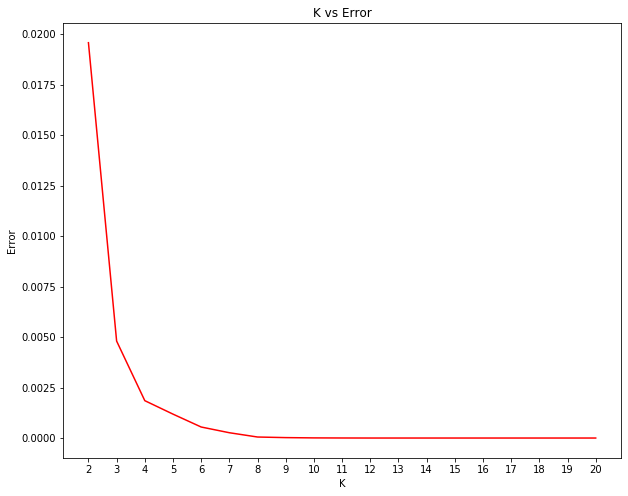

In [45]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [136]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of disti

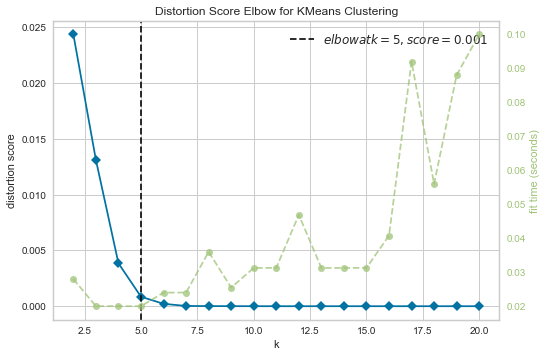

In [137]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

So we can see the optimum value of K is **5**

In [46]:
kclusters = 5

tor_grouped_clustering = indian_res.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 4, 0, 0, 0, 0, 0])

In [47]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
toronto_merged = indian_res.copy()

# add clustering labels
toronto_merged["Cluster Labels"] = kmeans.labels_

In [48]:
toronto_merged.head()

Neighborhood  Indian Restaurant  \
0                                        Agincourt           0.000000   
1                           Alderwood, Long Branch           0.000000   
2  Bathurst Manor, Wilson Heights, Downsview North           0.000000   
3                                  Bayview Village           0.000000   
4                Bedford Park, Lawrence Manor East           0.043478   

   Cluster Labels  
0               0  
1               0  
2               0  
3               0  
4               4

In [49]:
# Now merge toronto grouped with previous toronto data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(Toronto_Venues.set_index("Neighborhood"), on="Neighborhood")

print(toronto_merged.shape)
toronto_merged.head()

(2112, 9)


Neighborhood  Indian Restaurant  Cluster Labels  \
0               Agincourt                0.0               0   
0               Agincourt                0.0               0   
0               Agincourt                0.0               0   
0               Agincourt                0.0               0   
1  Alderwood, Long Branch                0.0               0   

   Neighborhood Latitude  Neighborhood Longitude  \
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
0              43.794200              -79.262029   
1              43.602414              -79.543484   

                              Venue  Venue Latitude  Venue Longitude  \
0       Panagio's Breakfast & Lunch       43.792370       -79.260203   
0                     El Pulgarcito       43.792648       -79.259208   
0                          Twilight       43.791999       -79.258584   
0                   Commander Arena       43.794867       -79.267989   
1  Il Paesano Pizzeria & Restaurant       43.601280       -79.545028   

              Venue Category  
0             Breakfast Spot  
0  Latin American Restaurant  
0                     Lounge  
0               Skating Rink  
1                Pizza Place

In [50]:
# sort the results by Cluster Labels
print(toronto_merged.shape)
toronto_merged.sort_values(["Cluster Labels"], inplace=True)
toronto_merged

(2112, 9)


Neighborhood  Indian Restaurant  \
0                                           Agincourt           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
62        Queen's Park, Ontario Provincial Government           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63                          Regent Park, Harbourfront           0.000000   
63           

In [51]:
# To check how many locations has Indian Restaurant
toronto_merged['Venue Category'].value_counts()['Indian Restaurant']

14

We will create a new dataframe with the Neighborhood and Indian Restaurants

In [52]:
# create map
import folium # map rendering library

#Obtain the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
latitude_toronto = Df_new2['Latitude'].mean()
longitude_toronto = Df_new2['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(latitude_toronto, longitude_toronto))

map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

The geographical coordinates of Toronto are 43.70460773398059, -79.39715291165048


**No of Neighborhoods per cluster**

In [53]:
indian_res["Cluster Labels"] = kmeans.labels_
indian_res.head()

Neighborhood  Indian Restaurant  \
0                                        Agincourt           0.000000   
1                           Alderwood, Long Branch           0.000000   
2  Bathurst Manor, Wilson Heights, Downsview North           0.000000   
3                                  Bayview Village           0.000000   
4                Bedford Park, Lawrence Manor East           0.043478   

   Cluster Labels  
0               0  
1               0  
2               0  
3               0  
4               4

In [54]:
# How many neighborhoods in each cluster
indian_res['Cluster Labels'].value_counts()

0    83
3     6
4     2
2     2
1     2
Name: Cluster Labels, dtype: int64

#### Analysis of each cluster

+ __Cluster 1__

In [55]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df2 = df[['Borough','Neighborhood']]
C1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]
df_c1 = pd.merge(df2, C1, on='Neighborhood')
df_c1

Borough                                       Neighborhood  \
0           North York                                          Parkwoods   
1           North York                                          Parkwoods   
2           North York                                          Parkwoods   
3           North York                                          Parkwoods   
4           North York                                   Victoria Village   
5           North York                                   Victoria Village   
6           North York                                   Victoria Village   
7           North York                                   Victoria Village   
8           North York                                   Victoria Village   
9           North York                                   Victoria Village   
10    Downtown Toronto                          Regent Park, Harbourfront   
11    Downtown Toronto                          Regent Park, Harbourfront   
12    Downtown Toronto                          Regent Park, Harbourfront   
13    Downtown Toronto                          Regent Park, Harbourfront   
14    Downtown Toronto                          Regent Park, Harbourfront   
15    Downtown Toronto                          Regent Park, Harbourfront   
16    Downtown Toronto                          Regent Park, Harbourfront   
17    Downtown Toronto                          Regent Park, Harbourfront   
18    Downtown Toronto                          Regent Park, Harbourfront   
19    Downtown Toronto                          Regent Park, Harbourfront   
20    Downtown Toronto                          Regent Park, Harbourfront   
21    Downtown Toronto                          Regent Park, Harbourfront   
22    Downtown Toronto                          Regent Park, Harbourfront   
23    Downtown Toronto                          Regent Park, Harbourfront   
24    Downtown Toronto                          Regent Park, Harbourfront   
25    Downtown Toronto                          Regent Park, Harbourfront   
26    Downtown Toronto                          Regent Park, Harbourfront   
27    Downtown Toronto                          Regent Park, Harbourfront   
28    Downtown Toronto                          Regent Park, Harbourfront   
29    Downtown Toronto                          Regent Park, Harbourfront   
30    Downtown Toronto                          Regent Park, Harbourfront   
31    Downtown Toronto                          Regent Park, Harbourfront   
32    Downtown Toronto                          Regent Park, Harbourfront   
33    Downtown Toronto                          Regent Park, Harbourfront   
34    Downtown Toronto                          Regent Park, Harbourfront   
35    Downtown Toronto                          Regent Park, Harbourfront   
36    Downtown Toronto                          Regent Park, Harbourfront   
37    Downtown Toronto                          Regent Park, Harbourfront   
38    Downtown Toronto                          Regent Park, Harbourfront   
39    Downtown Toronto                          Regent Park, Harbourfront   
40    Downtown Toronto                          Regent Park, Harbourfront   
41    Downtown Toronto                          Regent Park, Harbourfront   
42    Downtown Toronto                          Regent Park, Harbourfront   
43    Downtown Toronto                          Regent Park, Harbourfront   
44    Downtown Toronto                          Regent Park, Harbourfront   
45    Downtown Toronto                          Regent Park, Harbourfront   
46    Downtown Toronto                          Regent Park, Harbourfront   
47    Downtown Toronto                          Regent Park, Harbourfront   
48    Downtown Toronto                          Regent Park, Harbourfront   
49    Downtown Toronto                          Regent Park, Harbourfront   
50    Downtown Toronto                          Regent Park, Harbourfront   
51    Downt

+ __Cluster 2__

In [56]:
C2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1]
df_c2 = pd.merge(df2, C2, on='Neighborhood')
df_c2

Borough                                       Neighborhood  \
0   Scarborough                                             Woburn   
1   Scarborough                                             Woburn   
2   Scarborough                                             Woburn   
3   Scarborough                                             Woburn   
4   Scarborough  Dorset Park, Wexford Heights, Scarborough Town...   
5   Scarborough  Dorset Park, Wexford Heights, Scarborough Town...   
6   Scarborough  Dorset Park, Wexford Heights, Scarborough Town...   
7   Scarborough  Dorset Park, Wexford Heights, Scarborough Town...   
8   Scarborough  Dorset Park, Wexford Heights, Scarborough Town...   
9   Scarborough  Dorset Park, Wexford Heights, Scarborough Town...   
10  Scarborough  Dorset Park, Wexford Heights, Scarborough Town...   

    Indian Restaurant  Cluster Labels  Neighborhood Latitude  \
0            0.250000               1              43.770992   
1            0.250000               1              43.770992   
2            0.250000               1              43.770992   
3            0.250000               1              43.770992   
4            0.285714               1              43.757410   
5            0.285714               1              43.757410   
6            0.285714               1              43.757410   
7            0.285714               1              43.757410   
8            0.285714               1              43.757410   
9            0.285714               1              43.757410   
10           0.285714               1              43.757410   

    Neighborhood Longitude                                        Venue  \
0               -79.216917                                  Tim Hortons   
1               -79.216917                           Korean Grill House   
2               -79.216917                      Al-Hamd Biryani & Pizza   
3               -79.216917                                    Starbucks   
4               -79.273304                                      Kairali   
5               -79.273304                           Kim Kim restaurant   
6               -79.273304                                  Pho Vietnam   
7               -79.273304                     Big Al's Pet Supercentre   
8               -79.273304                              Scarborough LRT   
9               -79.273304                  Salvation Army Thrift Store   
10              -79.273304  Karaikudi Chettinad South Indian Restaurant   

    Venue Latitude  Venue Longitude          Venue Category  
0        43.770827       -79.223078             Coffee Shop  
1        43.770812       -79.214502       Korean Restaurant  
2        43.767585       -79.219570       Indian Restaurant  
3        43.770037       -79.221156             Coffee Shop  
4        43.754915       -79.276945       Indian Restaurant  
5        43.753833       -79.276611      Chinese Restaurant  
6        43.757770       -79.278572   Vietnamese Restaurant  
7        43.759279       -79.278325               Pet Store  
8        43.756465       -79.272194      Light Rail Station  
9        43.755782       -79.276208  Thrift / Vintage Store  
10       43.756042       -79.276276       Indian Restaurant

+ __Cluster 3__

In [57]:
C3=toronto_merged.loc[toronto_merged['Cluster Labels'] == 2]
df_c3 = pd.merge(df2, C3, on='Neighborhood')
df_c3

Borough                   Neighborhood  Indian Restaurant  \
0     East York               Thorncliffe Park           0.095238   
1     East York               Thorncliffe Park           0.095238   
2     East York               Thorncliffe Park           0.095238   
3     East York               Thorncliffe Park           0.095238   
4     East York               Thorncliffe Park           0.095238   
5     East York               Thorncliffe Park           0.095238   
6     East York               Thorncliffe Park           0.095238   
7     East York               Thorncliffe Park           0.095238   
8     East York               Thorncliffe Park           0.095238   
9     East York               Thorncliffe Park           0.095238   
10    East York               Thorncliffe Park           0.095238   
11    East York               Thorncliffe Park           0.095238   
12    East York               Thorncliffe Park           0.095238   
13    East York               Thorncliffe Park           0.095238   
14    East York               Thorncliffe Park           0.095238   
15    East York               Thorncliffe Park           0.095238   
16    East York               Thorncliffe Park           0.095238   
17    East York               Thorncliffe Park           0.095238   
18    East York               Thorncliffe Park           0.095238   
19    East York               Thorncliffe Park           0.095238   
20    East York               Thorncliffe Park           0.095238   
21  Scarborough  Steeles West, L'Amoreaux West           0.071429   
22  Scarborough  Steeles West, L'Amoreaux West           0.071429   
23  Scarborough  Steeles West, L'Amoreaux West           0.071429   
24  Scarborough  Steeles West, L'Amoreaux West           0.071429   
25  Scarborough  Steeles West, L'Amoreaux West           0.071429   
26  Scarborough  Steeles West, L'Amoreaux West           0.071429   
27  Scarborough  Steeles West, L'Amoreaux West           0.071429   
28  Scarborough  Steeles West, L'Amoreaux West           0.071429   
29  Scarborough  Steeles West, L'Amoreaux West           0.071429   
30  Scarborough  Steeles West, L'Amoreaux West           0.071429   
31  Scarborough  Steeles West, L'Amoreaux West           0.071429   
32  Scarborough  Steeles West, L'Amoreaux West           0.071429   
33  Scarborough  Steeles West, L'Amoreaux West           0.071429   
34  Scarborough  Steeles West, L'Amoreaux West           0.071429   

    Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
0                2              43.705369              -79.349372   
1                2              43.705369              -79.349372   
2                2              43.705369              -79.349372   
3                2              43.705369              -79.349372   
4                2              43.705369              -79.349372   
5                2              43.705369              -79.349372   
6                2              43.705369              -79.349372   
7                2              43.705369              -79.349372   
8                2              43.705369              -79.349372   
9                2              43.705369              -79.349372   
10               2              43.705369              -79.349372   
11               2              43.705369              -79.349372   
12               2              43.705369              -79.349372   
13               2              43.705369              -79.349372   
14               2              43.705369              -79.349372   
15               2              43.705369              -79.349372   
16               2              43.705369              -79.349372   
17               2              43.705369              -79.349372   
18               2              43.705369              -79.349372   
19               2              43.705369              -79.349372   
20               2              43.705369              -79.349372   
21   

+ __Cluster 4__

In [58]:
C4=toronto_merged.loc[toronto_merged['Cluster Labels'] == 3]
df_c4 = pd.merge(df2, C4, on='Neighborhood')
df_c4

Borough                                       Neighborhood  \
0    Downtown Toronto                                 Central Bay Street   
1    Downtown Toronto                                 Central Bay Street   
2    Downtown Toronto                                 Central Bay Street   
3    Downtown Toronto                                 Central Bay Street   
4    Downtown Toronto                                 Central Bay Street   
5    Downtown Toronto                                 Central Bay Street   
6    Downtown Toronto                                 Central Bay Street   
7    Downtown Toronto                                 Central Bay Street   
8    Downtown Toronto                                 Central Bay Street   
9    Downtown Toronto                                 Central Bay Street   
10   Downtown Toronto                                 Central Bay Street   
11   Downtown Toronto                                 Central Bay Street   
12   Downtown Toronto                                 Central Bay Street   
13   Downtown Toronto                                 Central Bay Street   
14   Downtown Toronto                                 Central Bay Street   
15   Downtown Toronto                                 Central Bay Street   
16   Downtown Toronto                                 Central Bay Street   
17   Downtown Toronto                                 Central Bay Street   
18   Downtown Toronto                                 Central Bay Street   
19   Downtown Toronto                                 Central Bay Street   
20   Downtown Toronto                                 Central Bay Street   
21   Downtown Toronto                                 Central Bay Street   
22   Downtown Toronto                                 Central Bay Street   
23   Downtown Toronto                                 Central Bay Street   
24   Downtown Toronto                                 Central Bay Street   
25   Downtown Toronto                                 Central Bay Street   
26   Downtown Toronto                                 Central Bay Street   
27   Downtown Toronto                                 Central Bay Street   
28   Downtown Toronto                                 Central Bay Street   
29   Downtown Toronto                                 Central Bay Street   
30   Downtown Toronto                                 Central Bay Street   
31   Downtown Toronto                                 Central Bay Street   
32   Downtown Toronto                                 Central Bay Street   
33   Downtown Toronto                                 Central Bay Street   
34   Downtown Toronto                                 Central Bay Street   
35   Downtown Toronto                                 Central Bay Street   
36   Downtown Toronto                                 Central Bay Street   
37   Downtown Toronto                                 Central Bay Street   
38   Downtown Toronto                                 Central Bay Street   
39   Downtown Toronto                                 Central Bay Street   
40   Downtown Toronto                                 Central Bay Street   
41   Downtown Toronto                                 Central Bay Street   
42   Downtown Toronto                                 Central Bay Street   
43   Downtown Toronto                                 Central Bay Street   
44   Downtown Toronto                                 Central Bay Street   
45   Downtown Toronto                                 Central Bay Street   
46   Downtown Toronto                                 Central Bay Street   
47   Downtown Toronto                                 Central Bay Street   
48   Downtown Toronto                                 Central Bay Street   
49   Downtown Toronto                                 Central Bay Street   
50   Downtown Toronto                                 Central Bay Street   
51   Downtown Toronto                                 Central 

+ __Cluster 5__

In [59]:
C5=toronto_merged.loc[toronto_merged['Cluster Labels'] == 4]
df_c5 = pd.merge(df2, C5, on='Neighborhood')
df_c5

Borough                         Neighborhood  Indian Restaurant  \
0        North York    Bedford Park, Lawrence Manor East           0.043478   
1        North York    Bedford Park, Lawrence Manor East           0.043478   
2        North York    Bedford Park, Lawrence Manor East           0.043478   
3        North York    Bedford Park, Lawrence Manor East           0.043478   
4        North York    Bedford Park, Lawrence Manor East           0.043478   
5        North York    Bedford Park, Lawrence Manor East           0.043478   
6        North York    Bedford Park, Lawrence Manor East           0.043478   
7        North York    Bedford Park, Lawrence Manor East           0.043478   
8        North York    Bedford Park, Lawrence Manor East           0.043478   
9        North York    Bedford Park, Lawrence Manor East           0.043478   
10       North York    Bedford Park, Lawrence Manor East           0.043478   
11       North York    Bedford Park, Lawrence Manor East           0.043478   
12       North York    Bedford Park, Lawrence Manor East           0.043478   
13       North York    Bedford Park, Lawrence Manor East           0.043478   
14       North York    Bedford Park, Lawrence Manor East           0.043478   
15       North York    Bedford Park, Lawrence Manor East           0.043478   
16       North York    Bedford Park, Lawrence Manor East           0.043478   
17       North York    Bedford Park, Lawrence Manor East           0.043478   
18       North York    Bedford Park, Lawrence Manor East           0.043478   
19       North York    Bedford Park, Lawrence Manor East           0.043478   
20       North York    Bedford Park, Lawrence Manor East           0.043478   
21       North York    Bedford Park, Lawrence Manor East           0.043478   
22       North York    Bedford Park, Lawrence Manor East           0.043478   
23  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
24  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
25  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
26  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
27  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
28  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
29  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
30  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
31  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
32  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
33  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
34  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
35  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
36  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
37  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
38  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
39  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
40  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
41  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
42  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
43  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
44  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   
45  Central Toronto  The Annex, North Midtown, Yorkville           0.043478   

    Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
0                4              43.733283              -79.419750   
1                4              43.733283              -79.419750   
2                4              43.733283              -79.419750   
3                4    

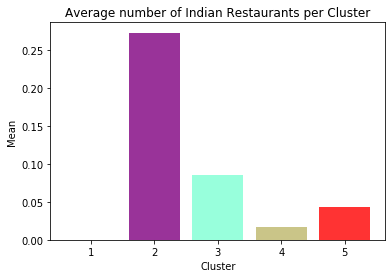

In [60]:
clusters_mean = [df_c1['Indian Restaurant'].mean(),df_c2['Indian Restaurant'].mean(),df_c3['Indian Restaurant'].mean(),
                 df_c4['Indian Restaurant'].mean(),df_c5['Indian Restaurant'].mean()]
objects = (1,2,3,4,5)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Indian Restaurants per Cluster')

plt.show()

**Cluster 2** has most of the **Indian Restaurant** followed by **Cluster 3** and **Cluster 5**

---

## Results

+ **Observations**

  After analyzing the data we observe different results as follows:-


+ **East Toronto** Borough has max no of Indian Restaurant in Toronto City


+ **East Toronto** Borough has **9** Indian Restaurant followed by **Scarborough** which has **8** and
  **Downtown Toronto** which has **7** Indian Restaurant where as **York** Borough has least Indian Restaurant preset its count   is only **1** in Toronto City respectively.
  
  
+ **India Bazaar, The Beaches West** Neighborhoods has maximum no of Indian Restaurant with a count of  **7** followed by      **Davisville** and **Thorncliffe Park** which has **3** Indian Restaurant each in Toronto City respectively.


+ It is under the **East Toronto** Borough The **Indian Bazaar, The Beaches West** Neighborhood falls, which has maximum no of   Indian Cuisine Restaurant in Toronto city.


+ We can observe **Banjara Indian Cuisine** of Indian Restaurant got the Max _Likes_ , _Rating_ & _Tips_.
  It belongs to **Christie** Neighborhood and of **Downtown Toronto** Borough.
  
  
  
+ **St. James Town, Cabbagetown** Neighborhood has the Highest Avg Rating in Toronto City with **8.40** rating.



+ **Butter Chicken Factory** has the Highest Rating  followed by **Banjara Indian Cuisine** and **Madras Masala**.


+ **Cluster 2** has most of the **Indian Restaurant** followed by **Cluster 3** and **Cluster 5**


---

## Discussion

According to the analysis and result we conclude that to taste the best Indian Restaurant in the Toronto city we have to visit  Butter Chicken Factory as currently it has the highest Average Rating of 8.4 . Moreover for Business purpose it is recommended to start a business of Indian Restaurant in York Borough which has least no of Indian Restaurant and the demand will be high as expected.

Now the competition here will be in between East Toronto , Scarborough and Downtown Toronto Borough as these are the top three areas where Indian restaurants are found in good no of amount so there will be tough competition for new comers.

The India Bazaar, The Beaches West Neighborhoods has maximum no of Indian Restaurant which also marked as competition zone  where as Neighborhood like Agincourt, Wexford, Maryval, Leaside, Woburn and others has least Indian Restaurants and business can be done with an expectation of good return. 

---

## Conclusion

Finally to conclude this capstone project, I have got a small glimpse of how real life data-science projects look like. 
In this project I have imported different types of python libraries such as panda, numpy, matplotlib I have also used  
BeautifulSoup package to web scrape data.

I have also used Foursquare api to get the latitude and longitude data of Toronto City by Geopy Client. I have explored the different Borough, Neighborhood of Toronto city and analyse the data to get different outcome for Indian Restaurants of different parts of the city. 

I have also used Machine learning technique K-Means clustering to cluster the neighborhoods and predicted a result which may help many business enthusiasts for opening Indian Restaurant in Toronto city where profit will be maximum and the demand is high.

This kind of analysis will provide me initial guidance to take more real-life challenges using data-science.


---

## References

+ Coursera
+ wikipedia.org
+ https://cocl.us/Geospatial_data
+ https://foursquare.com/
